In [ ]:
#importing libraries
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import model_from_json
import math 
from sklearn.metrics import mean_squared_error

In [ ]:
#mounting to Google Drive
drive.mount("/content/drive")
path = '/content/drive/My Drive/Machine Learning/msft.us.txt'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#reading the stock .txt file from https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs
msftText = open(path).read()
msftText = msftText.split(sep=',')

In [ ]:
#Processing Dates Data to get it in the right format

rawDates = msftText[0::6]
del rawDates[len(rawDates)-1]

dates = []
for date in rawDates: 
    if date == 'OpenInt\n1986-03-13':
      dates.append(date.replace('OpenInt\n', ''))
    else:
      dates.append(date.replace('0\n', ''))

print(dates)
#print(msftMatrix)

['Date', '1986-03-13', '1986-03-14', '1986-03-17', '1986-03-18', '1986-03-19', '1986-03-20', '1986-03-21', '1986-03-24', '1986-03-25', '1986-03-26', '1986-03-27', '1986-03-31', '1986-04-01', '1986-04-02', '1986-04-03', '1986-04-04', '1986-04-07', '1986-04-08', '1986-04-09', '1986-04-10', '1986-04-11', '1986-04-14', '1986-04-15', '1986-04-16', '1986-04-17', '1986-04-18', '1986-04-21', '1986-04-22', '1986-04-23', '1986-04-24', '1986-04-25', '1986-04-28', '1986-04-29', '1986-04-30', '1986-05-01', '1986-05-02', '1986-05-05', '1986-05-06', '1986-05-07', '1986-05-08', '1986-05-09', '1986-05-12', '1986-05-13', '1986-05-14', '1986-05-15', '1986-05-16', '1986-05-19', '1986-05-20', '1986-05-21', '1986-05-22', '1986-05-23', '1986-05-27', '1986-05-28', '1986-05-29', '1986-05-30', '1986-06-02', '1986-06-03', '1986-06-04', '1986-06-05', '1986-06-06', '1986-06-09', '1986-06-10', '1986-06-11', '1986-06-12', '1986-06-13', '1986-06-16', '1986-06-17', '1986-06-18', '1986-06-19', '1986-06-20', '1986-06-23

In [ ]:
#Processing the Rest
#Getting every piece of data in that .txt into a list of floats

#converts a list of strings into a list of floats
def listToFloat(dataList):
  list2 = [float(n) for n in dataList]
  return list2

opening = msftText[7::6]
opening = listToFloat(opening)
print(opening)

high = msftText[8::6]
high = listToFloat(high)
print(high)

low = msftText[9::6]
low = listToFloat(low)
print(low)

close = msftText[10::6]
close = listToFloat(close)
print(close)

volume = msftText[11::6]
volume = listToFloat(volume)
print(volume)

[0.0672, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.0672, 0.0672, 0.0672, 0.0672, 0.07533, 0.07533, 0.0672, 0.07533, 0.07533, 0.07533, 0.0672, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.08389, 0.09222, 0.09222, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.09222, 0.09222, 0.09222, 0.09222, 0.09222, 0.09222, 0.09222, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.07533, 0.07533, 0.08389, 0.08389, 0.08389, 0.08389, 0.07533, 0.07533, 0.07533, 0.0672, 0.0672, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.08389, 0.08389, 0.07533, 0.07533, 

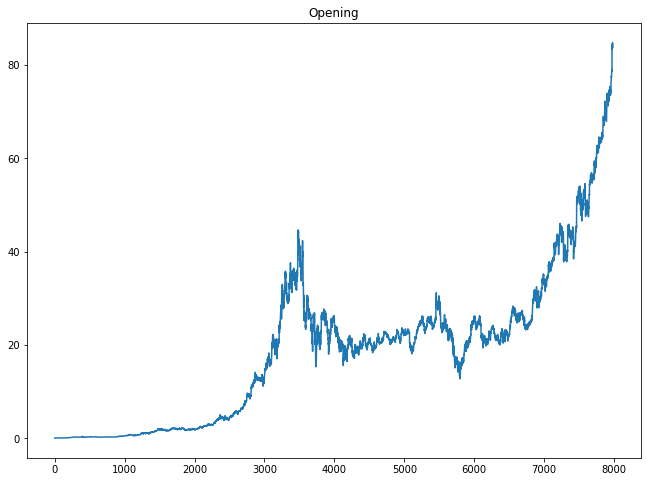

In [ ]:
#plotting the opening data
plt.figure(figsize=(11,8))

plt.plot(opening)
plt.title('Opening')
plt.show()

In [ ]:
#MinMax scaling data between 0 and 1
#LSTMs require the data to be normalized like this
scaler = MinMaxScaler(feature_range=(0,1))
openingData = scaler.fit_transform(np.array(opening).reshape(-1,1))
print(openingData)
print(len(openingData))

[[0.00000000e+00]
 [9.59826594e-05]
 [9.59826594e-05]
 ...
 [9.92562229e-01]
 [9.92208050e-01]
 [9.88430135e-01]]
7983


In [ ]:
#Split train and test data
dataSegment = openingData[5000:7000]
print(len(dataSegment), 'data points')

training_size = int(len(dataSegment)*.7) #70% of data will be training data
test_size = len(dataSegment)-training_size #The rest will be test data

train_data = dataSegment[0:training_size] 
test_data = dataSegment[training_size:len(dataSegment)]

print(len(train_data))
print(len(test_data))

2000 data points
1400
600


In [ ]:
#Creating the usable matrix using a time step which is important for time series

#Function adapted from https://github.com/krishnaik06/Stock-MArket-Forecasting
#Most following logic was also adapted from that github

#Creates an x and y dataset using a timestep. 
#The number of columns is the time step size
#The number of rows is the length of train/test data - (time step)
def createDataset(dataset, timeStep):
  dataX, dataY = [], []
  for i in range(len(dataset) - timeStep):
    a = dataset[i:(i + timeStep), 0]
    dataX.append(a)
    dataY.append(dataset[i + timeStep, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
#Setting time step to 100 and creating the x and y train and test data
timeStep = 100
x_train, y_train = createDataset(train_data, timeStep)
x_test, y_test = createDataset(test_data, timeStep)

print(x_train)
print(y_train)


print(x_train.shape)
print(y_train.shape)

# print(x_test.shape)
# print(y_test.shape)

[[0.26584481 0.2628579  0.26669484 ... 0.23194983 0.22899833 0.22444122]
 [0.2628579  0.26669484 0.26848935 ... 0.22899833 0.22444122 0.22623573]
 [0.26669484 0.26848935 0.2668011  ... 0.22444122 0.22623573 0.22403982]
 ...
 [0.25878483 0.25791119 0.25433398 ... 0.26684832 0.2709568  0.27639936]
 [0.25791119 0.25433398 0.25462913 ... 0.2709568  0.27639936 0.27674174]
 [0.25433398 0.25462913 0.25324783 ... 0.27639936 0.27674174 0.2709568 ]]
[0.22623573 0.22403982 0.22235156 ... 0.27674174 0.2709568  0.27321175]
(1300, 100)
(1300,)


In [ ]:
#Reshape input so the LSTM model can use it

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
#Stacking our sequential model with a mse loss function and adam optimizer
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Train the model
model1 = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 4s 212ms/step - loss: 0.0119 - accuracy: 0.0000e+00 - val_loss: 8.4858e-04 - val_accuracy: 0.0000e+00
Epoch 2/100
21/21 [==============================] - 4s 176ms/step - loss: 8.4881e-04 - accuracy: 0.0000e+00 - val_loss: 9.9737e-04 - val_accuracy: 0.0000e+00
Epoch 3/100
21/21 [==============================] - 4s 174ms/step - loss: 5.0971e-04 - accuracy: 0.0000e+00 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 4/100
21/21 [==============================] - 4s 172ms/step - loss: 4.2123e-04 - accuracy: 0.0000e+00 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 5/100
21/21 [==============================] - 4s 171ms/step - loss: 3.5938e-04 - accuracy: 0.0000e+00 - val_loss: 6.4958e-04 - val_accuracy: 0.0000e+00
Epoch 6/100
21/21 [==============================] - 4s 171ms/step - loss: 2.9943e-04 - accuracy: 0.0000e+00 - val_loss: 5.1148e-04 - val_accuracy: 0.0000e+00
Epoch 7/100
21/21 [==============================] - 4s 17

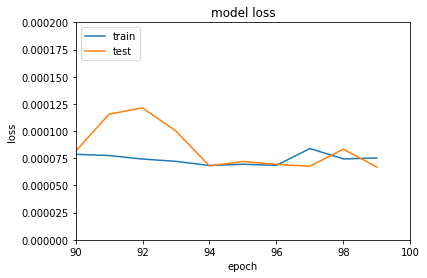

In [ ]:
#Plotting loss of train and test set
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axis([90, 100, 0, .0002])
plt.show()

In [ ]:
#Creating our prediction sets of data we trained on
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [ ]:
#Change back into original values instead of 0-1
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
#Calculate RMSE
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

22.458948355875446
27.010172527221073


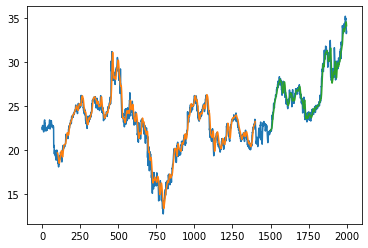

In [ ]:
#Plotting train/test predictions over original data
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(dataSegment)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataSegment)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2):len(dataSegment), :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataSegment))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
#Reshaping x input
x_input=test_data[500:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
#Putting that data in a list
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
print(temp_input)

[0.33119094055922593, 0.33444939246400357, 0.336456409941584, 0.33750714262102316, 0.33348130168070006, 0.335712632876363, 0.3321354193722049, 0.33189929966896015, 0.33928984638052107, 0.3448858833474218, 0.3416274314426442, 0.3445671217480414, 0.3406357286890162, 0.3388176069740315, 0.3369168433629113, 0.33659808176353084, 0.3331861520516441, 0.3350042737666287, 0.3411669980213169, 0.37280703825611433, 0.3646254905386835, 0.3551925083940554, 0.3539174619965338, 0.3489943661838806, 0.3536931482784512, 0.33649182789707066, 0.33267849468966787, 0.32958532657716155, 0.33159234405474197, 0.33096662684114336, 0.33808563589397284, 0.34521645093196446, 0.3468102589288666, 0.34729430432051833, 0.3538112081300736, 0.35422441761075196, 0.34923048588712535, 0.35487374679467504, 0.3541063577591296, 0.3448858833474218, 0.3484040669257687, 0.34434280802995887, 0.34594842201202325, 0.3485221267773911, 0.3497853671897505, 0.3533979986493953, 0.3535868944119911, 0.3591120954679184, 0.35710507799033797,

In [ ]:
#Predict the Next 30 Days
#Function adapted from https://github.com/krishnaik06/Stock-MArket-Forecasting

lst_output=[]
n_steps=100
i=0
while(i<30): #will predict 30 days of opening data
    
    if(len(temp_input)>100): #100 corresponds to timestep
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.39880985]
101
1 day output [[0.39551124]]
2 day output [[0.39265603]]
3 day output [[0.39023364]]
4 day output [[0.38814166]]
5 day output [[0.38626486]]
6 day output [[0.38451138]]
7 day output [[0.38282084]]
8 day output [[0.38116089]]
9 day output [[0.37951744]]
10 day output [[0.37788796]]
11 day output [[0.37627423]]
12 day output [[0.37467945]]
13 day output [[0.3731063]]
14 day output [[0.3715568]]
15 day output [[0.37003195]]
16 day output [[0.36853248]]
17 day output [[0.36705843]]
18 day output [[0.3656099]]
19 day output [[0.3641874]]
20 day output [[0.3627911]]
21 day output [[0.3614215]]
22 day output [[0.36007926]]
23 day output [[0.35876474]]
24 day output [[0.35747862]]
25 day output [[0.35622144]]
26 day output [[0.3549935]]
27 day output [[0.35379535]]
28 day output [[0.35262713]]
29 day output [[0.35148925]]
[[0.39880985021591187], [0.3955112397670746], [0.39265602827072144], [0.3902336359024048], [0.3881416618824005], [0.3862648606300354], [0.38451138138771057], 

In [ ]:
#Creating the x axis values for plotting
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
print(len(dataSegment))

2000


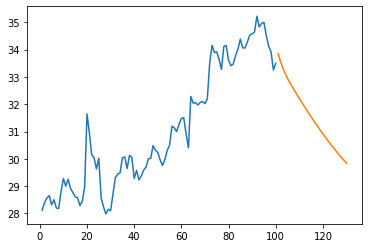

In [ ]:
#Plotting Prediction
plt.plot(day_new,scaler.inverse_transform(dataSegment[1900:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
#Connecting the orange and blue lines^^^
#Extending the orange line data onto predictionData
predictionData = dataSegment.tolist()
predictionData.extend(lst_output)

2030


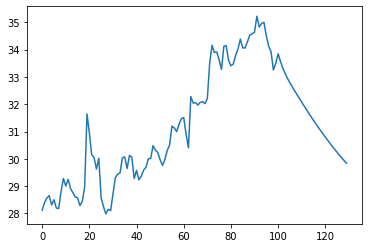

In [ ]:
#Plotting the connected line
plt.plot(scaler.inverse_transform(predictionData[1900:]))
print(len(predictionData))

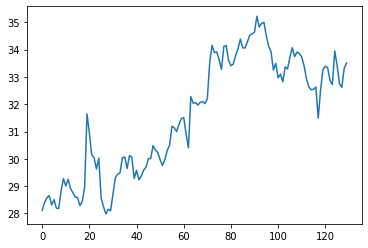

In [ ]:
#Plotting original data for comparison
plt.plot(opening[6900:7030])

In [ ]:
#Calculating and printing errors
#'Base error' is if a human was saying, "tomorrow will be the same as today"

baseError = 0
sum = 0
for i in range (30):
  baseError = (opening[6999 + i + 1] - opening[6999 + i])**2
  #print(i)
  sum += baseError

print('Base error:', math.sqrt(sum/30))
print('Model:', math.sqrt(mean_squared_error(opening[6999:7029], scaler.inverse_transform(predictionData[1999:2029]))))

Base error: 0.5020597573994546
Model: 1.8480672078085807
